In [1]:
import torch
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


# 1. PyTorch Basics: Tensor Operations

### Create a tensor from a NumPy array and perform element-wise operations (addition, multiplication, etc.).

In [2]:
tensor = np.array([[[1, 2, 3],
                    [3, 6, 9],
                    [2, 4, 5]]])
tensor = torch.tensor(tensor)
tensor

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [3]:
tensor

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [4]:
# Hadamard Product (Element -wise Multiplication)
mul = tensor * tensor
print('Hadamard Product (Element -wise Multiplication)')
print(mul)

# Dot Product
print("tensor.matmul(tensor)")
print(tensor.matmul(tensor))


Hadamard Product (Element -wise Multiplication)
tensor([[[ 1,  4,  9],
         [ 9, 36, 81],
         [ 4, 16, 25]]])
tensor.matmul(tensor)
tensor([[[ 13,  26,  36],
         [ 39,  78, 108],
         [ 24,  48,  67]]])


In [5]:
add = tensor + tensor
add

tensor([[[ 2,  4,  6],
         [ 6, 12, 18],
         [ 4,  8, 10]]])

### Convert a tensor back to a NumPy array.

In [6]:
nparr = tensor.numpy()
nparr

array([[[1, 2, 3],
        [3, 6, 9],
        [2, 4, 5]]])

### Perform matrix multiplication between two 2D tensors.

In [7]:
twodims_tensor = torch.tensor([[1, 2, 3],
                               [3, 6, 9],
                               [2, 4, 5]])
twodims_tensor

tensor([[1, 2, 3],
        [3, 6, 9],
        [2, 4, 5]])

In [8]:
mul_2d = twodims_tensor.matmul(twodims_tensor)
mul_2d

tensor([[ 13,  26,  36],
        [ 39,  78, 108],
        [ 24,  48,  67]])

### Reshape and transpose a tensor.

In [9]:
# reshape
tensor_reshape = torch.reshape(tensor, (-1,))
print('reshape tensor to vector 1d: ')
print(tensor_reshape)

print('')

# transpose 2d
tensor_transpose = twodims_tensor.T
print('transpose 2d tensor: ')
print(tensor_transpose)

reshape tensor to vector 1d: 
tensor([1, 2, 3, 3, 6, 9, 2, 4, 5])

transpose 2d tensor: 
tensor([[1, 3, 2],
        [2, 6, 4],
        [3, 9, 5]])


### **2. Simple Neural Network from Scratch**

- **Task**: Build a simple neural network using PyTorch's `nn.Module` class:
    - Create a fully connected feedforward neural network with one hidden layer (you can specify the size).
    - Use ReLU as the activation function and MSELoss for loss calculation.
    - Implement the forward pass and backpropagation manually.
    - Use random data (inputs and targets) to train the network for 100 epochs.



In [10]:
import torch
import torch.nn as nn
import torch.optim as optim

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # Non-linearity
        self.relu = nn.ReLU()
        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Linear function  # LINEAR
        out = self.fc1(x)
        # Non-linearity  # NON-LINEAR
        out = self.relu(out)
        # Linear function (readout)  # LINEAR
        out = self.fc2(out)
        return out

In [11]:
# Initialize the network, loss function, and optimizer
input_size = 10   # Example input size
hidden_size = 5   # Example c layer size
output_size = 1   # Example output size


model = FeedforwardNeuralNetModel(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [12]:
# Generate random input data and target outputs
inputs = torch.randn(100, input_size)  # 100 samples of input data
targets = torch.randn(100, output_size)  # 100 corresponding target outputs

In [13]:
# Train the network for 100 epochs
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Backward pass (manually implemented)
    optimizer.zero_grad()  # Zero the gradients
    loss.backward()  # Backpropagate the loss
    optimizer.step()  # Update the weights

    # Print loss every 10 epochs
    if (epoch+1) % 10 == 0:
      print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/1000], Loss: 1.1814
Epoch [20/1000], Loss: 1.1716
Epoch [30/1000], Loss: 1.1647
Epoch [40/1000], Loss: 1.1595
Epoch [50/1000], Loss: 1.1557
Epoch [60/1000], Loss: 1.1525
Epoch [70/1000], Loss: 1.1494
Epoch [80/1000], Loss: 1.1466
Epoch [90/1000], Loss: 1.1438
Epoch [100/1000], Loss: 1.1411
Epoch [110/1000], Loss: 1.1384
Epoch [120/1000], Loss: 1.1358
Epoch [130/1000], Loss: 1.1332
Epoch [140/1000], Loss: 1.1303
Epoch [150/1000], Loss: 1.1273
Epoch [160/1000], Loss: 1.1242
Epoch [170/1000], Loss: 1.1211
Epoch [180/1000], Loss: 1.1178
Epoch [190/1000], Loss: 1.1146
Epoch [200/1000], Loss: 1.1113
Epoch [210/1000], Loss: 1.1080
Epoch [220/1000], Loss: 1.1044
Epoch [230/1000], Loss: 1.1004
Epoch [240/1000], Loss: 1.0964
Epoch [250/1000], Loss: 1.0922
Epoch [260/1000], Loss: 1.0880
Epoch [270/1000], Loss: 1.0837
Epoch [280/1000], Loss: 1.0795
Epoch [290/1000], Loss: 1.0754
Epoch [300/1000], Loss: 1.0714
Epoch [310/1000], Loss: 1.0678
Epoch [320/1000], Loss: 1.0646
Epoch [330/1000],

### **3. Train a CNN on MNIST**

- **Task**: Train a model to classify digits from the MNIST dataset:
    - Use `torchvision.datasets.MNIST` to load the dataset.
    - Build a convolutional neural network (CNN) using `nn.Conv2d`, `nn.MaxPool2d`, and `nn.Linear`.
    - Train the model for at least 5 epochs using the Adam optimizer and cross-entropy loss.
    - Plot the training loss after each epoch.

In [14]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision

In [15]:
'''
STEP 1: LOADING DATASET
'''

train_dataset = torchvision.datasets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16296946.75it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 494427.37it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4529050.22it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5622942.38it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [16]:
# train data
print(train_dataset.train_data.size())
# test data
print(test_dataset.test_data.size())

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:81: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


In [17]:
# train label
print(train_dataset.train_labels.size())
# test label
print(test_dataset.test_labels.size())

torch.Size([60000])
torch.Size([10000])


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:71: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [18]:
# Make Dataset Iterable
batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [19]:
num_epochs

5

In [20]:
# CNN Architecture

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ReLU()

        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.relu2 = nn.ReLU()

        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)

        # Fully connected 1 (readout)
        self.fc1 = nn.Linear(32 * 7 * 7, 10)

    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)

        # Max pool 1
        out = self.maxpool1(out)

        # Convolution 2
        out = self.cnn2(out)
        out = self.relu2(out)

        # Max pool 2
        out = self.maxpool2(out)

        # Resize
        # Original size: (100, 32, 7, 7)
        # out.size(0): 100
        # New out size: (100, 32*7*7)
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        out = self.fc1(out)

        return out

In [21]:
model = CNNModel()
model = model.to(device)

In [22]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.01

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [23]:
print(model.parameters())

print(len(list(model.parameters())))

# Convolution 1: 16 Kernels
print(list(model.parameters())[0].size())

# Convolution 1 Bias: 16 Kernels
print(list(model.parameters())[1].size())

# Convolution 2: 32 Kernels with depth = 16
print(list(model.parameters())[2].size())

# Convolution 2 Bias: 32 Kernels with depth = 16
print(list(model.parameters())[3].size())

# Fully Connected Layer 1
print(list(model.parameters())[4].size())

# Fully Connected Layer Bias
print(list(model.parameters())[5].size())

<generator object Module.parameters at 0x7edbfe494430>
6
torch.Size([16, 1, 5, 5])
torch.Size([16])
torch.Size([32, 16, 5, 5])
torch.Size([32])
torch.Size([10, 1568])
torch.Size([10])


In [24]:
loss_list = []
accuracy_list = []
iter_list = []

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images
        images = images.requires_grad_()
        images = images.to(device)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images
                images = images.requires_grad_()
                images = images.to(device)

                labels = labels.to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Store loss and accuracy for plotting
            loss_list.append(loss.item())
            accuracy_list.append(accuracy.item())
            iter_list.append(iter)

            # Print Loss and Accuracy
            print(f"Iteration: {iter}. Loss: {loss.item()}. Accuracy: {accuracy.item()}")

Iteration: 500. Loss: 0.004143229220062494. Accuracy: 98.04999542236328
Iteration: 1000. Loss: 0.053776536136865616. Accuracy: 98.16999816894531
Iteration: 1500. Loss: 0.0049263425171375275. Accuracy: 98.40999603271484
Iteration: 2000. Loss: 0.025696933269500732. Accuracy: 98.8699951171875
Iteration: 2500. Loss: 0.041132498532533646. Accuracy: 98.54999542236328
Iteration: 3000. Loss: 0.0024243223015218973. Accuracy: 98.25


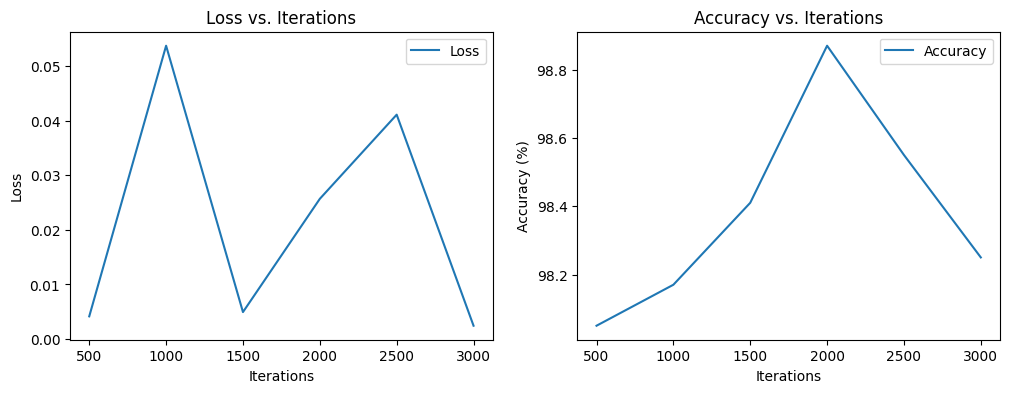

In [25]:
import matplotlib.pyplot as plt

# Plot loss and accuracy
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(iter_list, loss_list, label="Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs. Iterations")
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(iter_list, accuracy_list, label="Accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs. Iterations")
plt.legend()

plt.show()

### **4. Transfer Learning with Pretrained Models**

- **Task**: Fine-tune a pretrained model (e.g., ResNet) for a binary classification task:
    - Use `torchvision.models` to load a pretrained ResNet model.
    - Modify the last layer to output two classes.
    - Use the CIFAR10 dataset and convert it to a binary classification problem (e.g., cars vs. airplanes).
    - Fine-tune the model and report the test accuracy.

In [69]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, models, transforms
import numpy as np
import matplotlib.pyplot as plt
import time
import os

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### Data Preparation

In [70]:
# Data transformations (normalization and augmentation)
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomResizedCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Load the CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=data_transforms['train'])
val_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=data_transforms['val'])

# Filter only cars (label 1) and airplanes (label 0)
classes_to_keep = [0, 1]  # airplane and car
train_indices = [i for i, (x, y) in enumerate(train_dataset) if y in classes_to_keep]
val_indices = [i for i, (x, y) in enumerate(val_dataset) if y in classes_to_keep]

train_dataset = Subset(train_dataset, train_indices)
val_dataset = Subset(val_dataset, val_indices)

Files already downloaded and verified
Files already downloaded and verified


In [71]:
# # Modify labels to binary
def modify_labels(dataset):
    for i in range(len(dataset)):
        _, label = dataset[i]
        if label == 0:  # Airplane
            dataset.dataset.targets[dataset.indices[i]] = 0
        else:  # Car
            dataset.dataset.targets[dataset.indices[i]] = 1

modify_labels(train_dataset)
modify_labels(val_dataset)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [72]:
dataset_sizes = {'train': len(train_loader.dataset), 'val': len(val_loader.dataset)}
dataset_sizes

{'train': 10000, 'val': 2000}

### Load Pretrained ResNet and Modify the Last Layer

In [73]:
# Load pretrained ResNet18 model
model = models.resnet18(pretrained=True)

# Modify the last layer
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)

model = model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 183MB/s]


### Train and Fine-tune the Model


In [74]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data
            dataloader = train_loader if phase == 'train' else val_loader
            for inputs, labels in dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward pass
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward pass and optimize in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # Deep copy the model if it performs better
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:.4f}')

    return model

# Train the model
model_ft = train_model(model, criterion, optimizer, scheduler, num_epochs=10)

Epoch 0/9
----------
train Loss: 0.2792 Acc: 0.8769
val Loss: 0.0755 Acc: 0.9680
Epoch 1/9
----------
train Loss: 0.1861 Acc: 0.9213
val Loss: 0.0364 Acc: 0.9885
Epoch 2/9
----------
train Loss: 0.1596 Acc: 0.9343
val Loss: 0.0314 Acc: 0.9910
Epoch 3/9
----------
train Loss: 0.1525 Acc: 0.9338
val Loss: 0.0269 Acc: 0.9915
Epoch 4/9
----------
train Loss: 0.1306 Acc: 0.9449
val Loss: 0.0275 Acc: 0.9925
Epoch 5/9
----------
train Loss: 0.1229 Acc: 0.9509
val Loss: 0.0260 Acc: 0.9925
Epoch 6/9
----------
train Loss: 0.1199 Acc: 0.9516
val Loss: 0.0200 Acc: 0.9910
Epoch 7/9
----------
train Loss: 0.1057 Acc: 0.9559
val Loss: 0.0154 Acc: 0.9955
Epoch 8/9
----------
train Loss: 0.1098 Acc: 0.9551
val Loss: 0.0191 Acc: 0.9935
Epoch 9/9
----------
train Loss: 0.1056 Acc: 0.9555
val Loss: 0.0170 Acc: 0.9950
Training complete in 6m 23s
Best val Acc: 0.9955


### **5. Save and Load Models**

- **Task**: Save a trained model to disk and then load it back to evaluate:
    - After training a model on any dataset (e.g., MNIST or CIFAR10), save the model’s state dictionary.
    - Write a separate script that loads the saved model and evaluates it on the test data.

In [75]:
# Save the trained model's state dictionary
torch.save(model_ft.state_dict(), 'resnet18_cifar10_binary.pth')
print("Model saved successfully!")

Model saved successfully!


In [76]:
def modify_labels(dataset):
    for i in range(len(dataset)):
        _, label = dataset[i]
        if label == 0:  # Airplane
            dataset.dataset.targets[dataset.indices[i]] = 0
        else:  # Car
            dataset.dataset.targets[dataset.indices[i]] = 1

modify_labels(val_dataset)

# Create DataLoader for the validation set
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)

# Load the pretrained ResNet18 model and modify the last layer
model = models.resnet18(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)

# Load the saved model state
model.load_state_dict(torch.load('resnet18_cifar10_binary.pth'))
model = model.to(device)
model.eval()  # Set the model to evaluation mode

# Evaluate the model
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
<ipython-input-76-77321ad6c50b>:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recomme

Test Accuracy: 99.50%
